# Calculating the autocorrelation function of a time series

_rev09 260819 DAL, Physics,SFU_

Autocorrelation function analysis is a mathematical tool for finding repeating patterns, such as the occurence of a periodic signal obscured by noise.  The autocorrelation function measures the relationship between a signal's current value and its past values.  The resulting output can range from **+1** to **-1**, where a value of **+1** represents a perfect positive correlation, and value of **-1** represents perfect negative correlation. A value of **0** means that the signal is completely uncorrelated.

## Load required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simulate a sine signal with random noise

In [2]:
# simulate data using a sine function with omega = 1 
dt = 0.01
t = np.arange(0, 10, dt)  # this results in 10,000 data points 

ns = np.random.randn(len(t))
r = np.exp(-t / 0.1)

cvns = np.convolve(ns, r) * dt
cvns = cvns[:len(t)]

s = 0.1 * np.sin(2 * np.pi * t) + cvns

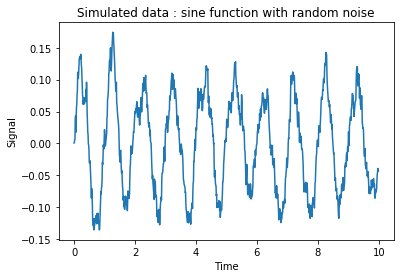

In [3]:
# plot the data
plt.plot(t,s)
plt.title('Simulated data : sine function with random noise')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.show()

## Calculate the autocorrelation function
First we define the autocorrelation function $ACF=\frac{<S(t)S(t+\tau)>}{<S(t)S(t)>}$

In [4]:
def autocorr(x):
    norm = sum(x*x)
    result = np.correlate(x, x, mode='full') / norm
    return result[result.size//2:] 
# result[result.size//2:] returns the second half the result array.
# np.correlate calculates correlations of +lagtime and -lagtime.

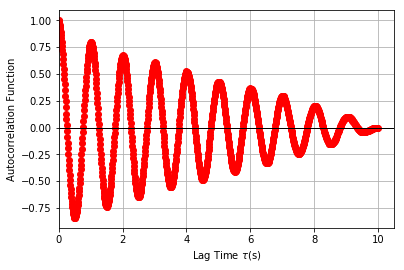

In [5]:
ACF = autocorr(s)
# now plot the result
plt.plot(t,ACF, 'ro')
plt.ylabel("Autocorrelation Function")
plt.xlabel("Lag Time " + r'$\tau$' + "(s)")
plt.xlim(0,)
plt.axhline(0, color='black', lw=1)
plt.grid(which='major', axis='both')
plt.show()